# Convection

## Forced Convection
To maintain the condition of constant masses for the thermal capaities, forced convections ,ust either go in a cycle or come from and go to an external storage

In [9]:
CP_WATER = 4182 # J/(kg*K)
from ThermoBuilPy import *
cap1 = ThermalStorage.newStorage(cap=1000,temp=30,name='Capacity 1')
cap2 = ThermalStorage.newStorageByMass(mass=1,cp=CP_WATER,temp=50,name='Capacity 2')
extStor1 = ExtStorage.newExtStorage(temp=70)
extStor2 = ExtStorage.newExtStorage()
forcedConv = ForcedConvection.newForcedConvection([extStor1,cap1,cap2,extStor2],massFlow=10)
ts = ThermalSystem.newThermalSystem(storages=[cap1,cap2],extStorages=[extStor1,extStor2],
                                    forcedConvection=[forcedConv])

In [10]:
ts.prepare_simulation(stepsize=1)
for t in range(20):
    ts.do_simstep()
forcedConv.set_mFlow(140)
for t in range(80):
    ts.do_simstep()

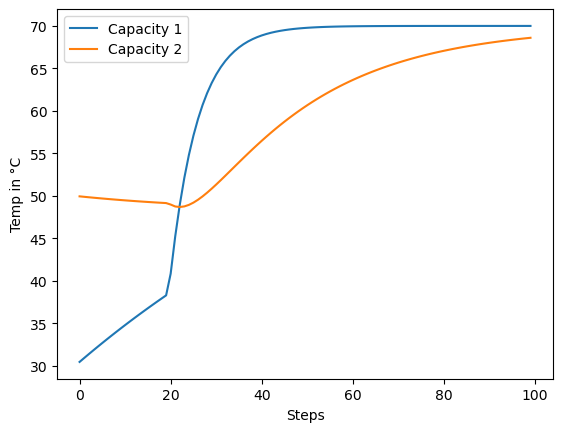

In [11]:
ts.plot_temps([cap1,cap2])

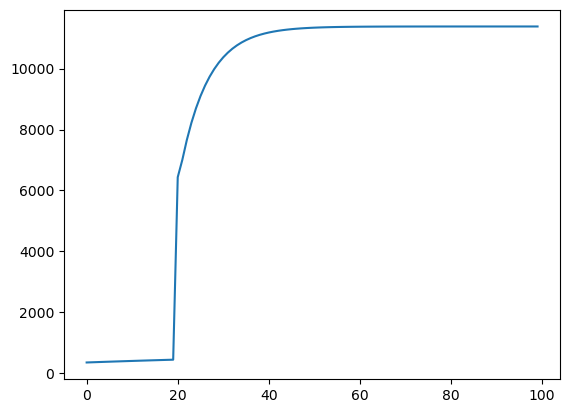

In [17]:
import matplotlib.pyplot as plt
plt.plot(forcedConv.get_heatflow_res()[1])